# Lecture 5

# Section 2: Object Oriented Programming in Python

Hint: All the examples and explanations from this second part of today's lecture can be found in chapter 10 of the book.

# 2.1 Objects basics


## How to create a simple Class

Classes are new data types.

Create a class named `Car`, with a (class) property named `brand`:

In [ ]:
class Car:
    brand = 'Porsche'

## How to create an Object from a Class
Now we can use the class named `Car` to create objects. Thus we _instantiate_ the class, i.e., we create an _instance_ of the class aka. an _object_.

In [ ]:
my_car = Car()
print(my_car.brand)
print(type(my_car))

## Let's add some more Attributes

In [ ]:
class Car:
    brand = 'Porsche'
    model = '964 Turbo'  
    milage = 63676       # Not yet very useful, why? 
    condition = 89

### The __init__() Function
The examples above are classes and objects in their simplest form, and are not really useful in real life applications. This is because the attributes (variables) are actually so called _class variables_, i.e., they belong to the class and (mostly) are the same for _all_ objects. This is often not what we want because objects (instances) are different.

To understand the meaning of classes we have to understand the built-in __init__() function (dunder/magic methods).

All classes have a function called __init__(), which is always executed when the class is being instatiated, i.e., an object is created/initiated.

Use the __init__() function to assign values to object properties, or other operations that are necessary to do when the object is being created. Here we create so called _instance variables_ whose values are specific to everey _instance_ (object).

In [ ]:
class Car():
    def __init__(self, brand, model, milage, condition):
        self.brand = brand
        self.model = model
        self.milage = milage
        self.condition = condition

 We can now create an object (i.e. a class instance). 

Each object __has datatype Car__!
The class actually __defines a new datatype__.

Python has some built-in datatypes (e.g., Strings, int, float, boolean) but it also gives you the option to define new custom datatypes.

Each object holds its own values for the attributes.

In [ ]:
c1 = Car("Porsche", '964 Turbo', 63676, 89)

print(c1.brand)
print(c1.model)
print(c1.milage)
print(c1.condition)

In [ ]:
c2 = Car("DeLorean Motor Company - DMC", 'DeLorean DMC-12', 23400, 74)

print(c2.brand)
print(c2.model)
print(c2.milage)
print(c2.condition)

Objects can be used as any other value in python. 
They can be:
* Assigned to variables
* Passed to functions
* Stored into data structures
* ...

Here are some examples.

In [ ]:
cars = []
cars.append(c1)
cars.append(c2)

In [ ]:
def print_car_brands(car_list):
    for c in car_list:
        print(c.brand)
        
print_car_brands(cars)

In [ ]:
def print_car_milage(car_list):
    for c in car_list:
        print(c.milage)

print_car_milage(cars)

In [ ]:
cars.append(Car('Volvo', 'V70R', 203200, 60))

print_car_milage(cars)

We can also assign values to existing attributes of existing objects: 

In [ ]:
print_car_milage(cars)

In [ ]:
c1.milage = 328_245
print_car_milage(cars)

In [ ]:
cars[2].milage = 205_000
print_car_milage(cars)

## Methods
It is, however, not a very good idea to manipulate an object's attribute value directly (more on this later). Instead, we often call a method for achieving certain changes.

In [ ]:
class Car():
    
    def __init__(self, brand, model, milage, condition):
        self.brand = brand
        self.model = model
        self.milage = milage
        self.condition = condition
        
    def drive(self, distance):
        if distance >= 0:
            self.milage += distance
            print(f'Wonderful, I just drove {distance} kilometer/s')
        else:
            print('The distances cannot be negative! I will not go backwards')

In [ ]:
c1 = Car("Porsche", '964 Turbo', 63676, 89)

print('original milage:', c1.milage)

In [ ]:
c1.drive(300)
print('milage after driving:', c1.milage)

In [ ]:
c1.drive(-300)

# 2.2 Custom Class Account 
* Bank `Account` class that holds an account holder’s name and balance
    * An actual bank account class would likely include lots of other information

## 2.2.1 Test-Driving Class Account 
* Each new class you create becomes a new _data type_ 
* Python is an **extensible language**
* Before we look at class `Account`’s definition, let’s demonstrate its capabilities 

### Importing Classes `Account` and `Decimal`
* you have to have extracted the `*.py` files and those being available in the folder of the Jupyter Notebook

In [ ]:
from account import Account
from decimal import Decimal

* `Account` maintains and manipulates the account balance as a `Decimal`
* decimals are similar to floats
* decimals are often more precise than floats, but also slower in operations (about 3 times slower) than floats
* for details see, e.g., https://blog.teclado.com/decimal-vs-float-in-python/

### Create an `Account` Object with a Constructor Expression
* Create an object with a **constructor expression** that builds and initializes an object
* Constructor expressions create new objects and initialize their data using argument(s) specified in parentheses
* Parentheses following the class name are required, even if there are no arguments

In [ ]:
account1 = Account('John Green', Decimal('50.00'))

### Getting an `Account`’s Name and Balance
* Access the `Account` object’s `name` and `balance` attributes

In [ ]:
account1.name

In [ ]:
account1.balance

### Depositing Money into an `Account` 
* `deposit` method receives a positive dollar amount and adds it to the balance

In [ ]:
account1.deposit(Decimal('25.53'))

In [ ]:
account1.balance

* `Account`’s methods validate their arguments

## 2.2.2 Account Class Definition 
### Defining a Class 
* Class definition begins with the keyword **`class`** followed by the class’s name and a colon (`:`)
* Called the **class header**
* _Style Guide for Python Code_ recommends that you begin each word in a multi-word class name with an uppercase letter
* Every statement in a class’s suite is indented

```python
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    

```

### Defining a Class (cont.) 
* `Account` is both the class name and the name used in a constructor expression to create an `Account` object and invoke the class’s `__init__` method

### Initializing Account Objects: Method `__init__` 
* Constructor expression creates a new object, then initializes its data by calling the class’s **`__init__`** method
* Each new class can provide an `__init__` method that specifies how to initialize an object’s data attributes
* Returning a value other than `None` from `__init__` results in a `TypeError`
* Class `Account`’s `__init__` method initializes an `Account` object’s `name` and `balance` attributes if the `balance` is valid

### Initializing Account Objects: Method `__init__` (cont.)
```python
    def __init__(self, name, balance):
        """Initialize an Account object."""

        # if balance is less than 0.00, raise an exception
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= to 0.00.')

        self.name = name
        self.balance = balance


```

* When you call a method for a specific object, Python implicitly passes a reference to that object as the method’s first argument
* So all methods of a class must specify at least one parameter
* By convention a method’s first parameter is named `self`
* Methods must use that reference (`self`) to access the object’s attributes and other methods

### Initializing Account Objects: Method `__init__` (cont.)
* When an object is created, it does not yet have any attributes
* They’re added _dynamically_ via assignments of the form:
```python
self.attribute_name = value
``` 

* Python classes may define many [special methods](https://docs.python.org/3/reference/datamodel.html#special-method-names), like `__init__`
* Each identified by leading and trailing double-underscores (`__`) in the method name
* Class **`object`** defines the special methods that are available for _all_ Python objects 

### Method `deposit` 
* Adds a positive `amount` to the account’s `balance` attribute
* Raises a `ValueError` if `amount` is less than `0.00`

```python
    def deposit(self, amount):
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount

```

## 2.2.3 Composition: Object References as Members of Classes
* An `Account` _has a_ `name`, and an `Account` _has a_ `balance`
* An object’s attributes are references to objects of other classes
* Embedding references to objects of other types is a form of software reusability known as **composition** and is sometimes referred to as the **“has a” relationship**

### Let's do some coding exercise
You want to start writing a programm for **University Course Administration**. Here you start with the following:
- define a class `Course`
- define an `__init__` method with the following parameters:
    - `course_name` (such as _Introduction to Computer Science for Business Studies_)
    - `course_code` (such as _4.125_)
    - `credits` (in integer with the ECTS for the course)
    - `capacity` (the max number of students in the course)
    - `instructor` (the one person who teaches the course)
    - beyond the parameters above, a course should also have a list of `enrolled_students`, which is however, always initialized as an empty list when a Course object is created
- define an `enroll_student` method that takes one argument (`student_name`) and adds the student to `enrolled_students` if there is capacity left
- define a `drop_student` method that takes one argument (`student_name`) and removes the student from `enrolled_students` if that student has been enrolled in the course
- define a `list_students` method that just prints the names of all `enrolled_students` of the course
- instatiate the class and test it 


In [ ]:
# Your Class definition goes here:

# start with the Class name:
class ...
    
    # then define the __init__ method: 
    def __init__(...
    
    # then define the enroll_student method:
    ...
    
    # and the drop_student method:
    ...
    
    # and finally the list_students method:
    ...
        
# Now let's create an object for a sample course
course = ...

# let's list the students
...


# 2.3 Controlling Access to Attributes 
* Previous example used attributes `name` and `balance` only to _get_ the values of those attributes
* However, we also can use those attributes to _modify_ their values

In [ ]:
from account import Account
from decimal import Decimal

In [ ]:
account1 = Account('John Green', Decimal('50.00'))

In [ ]:
account1.balance

* Set the `balance` attribute to an _invalid_ negative value, then display the `balance`

In [ ]:
account1.balance = Decimal('-1000.00')

In [ ]:
account1.balance

### Encapsulation 
* A class’s **client code** is any code that uses objects of the class
* Most object-oriented programming languages enable you to **encapsulate** (or _hide_) an object’s data from the client code
    * _private data_

### Leading Underscore (`_`) Naming Convention
* Python does _not_ have private data
* Use _naming conventions_ to design classes that encourage correct use
* By convention, Python programmers know that any attribute name beginning with an underscore (`_`) is for a class’s _internal use only_
* Attributes whose identifiers do _not_ begin with an underscore (`_`) are considered _publicly accessible_ for use in client code

# 2.4 `Time` Class with Properties for Data Access
* **Properties** can control the manner in which they get and modify an object’s data&mdash;**assuming programmers follow conventions**
* For robust date and time manipulation capabilities, see Python's [**datetime** module]( https://docs.python.org/3/library/datetime.html)

## 2.4.1 Test-Driving Class `Time` 
* Before we look at class `Time`’s definition, let’s demonstrate its capabilities
* Again, you have to have extracted the `*.py` files and those being available in the folder of the Jupyter Notebook

In [ ]:
from timewithproperties import Time

### Creating a `Time` Object
* Create a `Time` object
* Class `Time`’s `__init__` method has `hour`, `minute` and `second` parameters, each with a default argument value of 0

In [ ]:
wake_up = Time(hour=6, minute=30)

### Displaying a `Time` Object
* Class `Time` defines two methods that produce string representations of `Time` object
* When you evaluate a variable in IPython, it calls the object’s `__repr__` special method to produce a string representation of the object

In [ ]:
wake_up

* The `__str__` special method is called when an object is converted to a string, such as when you output the object with `print`

In [ ]:
print(wake_up)

### Getting an Attribute via a Property 
* Class `Time` provides `hour`, `minute` and `second` **properties**
    * Provide the convenience of data attributes for getting and modifying an object’s data
    * Implemented as methods, so they may contain additional logic

In [ ]:
wake_up.hour

* Appears to simply get an `hour` data attribute’s value
* Actually a call to an `hour` _method_ that returns the value of an `_hour` data attribute

### Setting the `Time` 
* `Time` method `set_time` method provides `hour`, `minute` and `second` parameters, each with a default of `0`

In [ ]:
wake_up.set_time(hour=7, minute=45)

In [ ]:
wake_up

### Setting an Attribute via a Property 
* Class `Time` also supports setting the `hour`, `minute` and `second` values individually via its properties

In [ ]:
wake_up.hour = 6

In [ ]:
wake_up

* Appears to simply assign a value to a data attribute
* Actually a call to an `hour` method that takes `6` as an argument, validates the value, then assigns it to a corresponding data attribute named `_hour`

### Attempting to Set an Invalid Value 
To prove that class `Time`’s properties _validate_ the values you assign to them, let’s try to assign an invalid value to the `hour` property, which results in a `ValueError`:

In [ ]:
wake_up.hour = 100

## 2.4.2 Class `Time` Definition

### Class Time: `__init__` Method with Default Parameter Values
* Specifies `hour`, `minute` and `second` parameters, each with a default argument of `0`
* The statements containing `self.hour`, `self.minute` and `self.second` _appear_ to create `hour`, `minute` and `second` attributes for the new `Time` object (`self`)
* These statements actually call methods that implement the class’s `hour`, `minute` and `second` _properties_ 
* Those methods create attributes named `_hour`, `_minute` and `_second` 

```python
# timewithproperties.py
"""Class Time with read-write properties."""

class Time:
    """Class Time with read-write properties."""

    def __init__(self, hour=0, minute=0, second=0):
        """Initialize each attribute."""
        self.hour = hour  # 0-23
        self.minute = minute  # 0-59
        self.second = second  # 0-59


```

### Class Time: `hour` Read-Write Property
* Methods named `hour` define a _publicly accessible_ **read-write property** named `hour` that manipulates a data attribute named `_hour`
* The single-leading-underscore (`_`) naming convention indicates that client code should not access `_hour` directly
* Properties look like data attributes to programmers working with `Time` objects, but are implemented as _methods_
* Each property defines a _getter_ method which _gets_ (returns) a data attribute’s value 
* Each property can _optionally_ define a _setter_ method which _sets_ a data attribute’s value

```python 
    @property
    def hour(self):
        """Return the hour."""
        return self._hour

    @hour.setter
    def hour(self, hour):
        """Set the hour."""
        if not (0 <= hour < 24):
            raise ValueError(f'Hour ({hour}) must be 0-23')

        self._hour = hour


```

### Class Time: `hour` Read-Write Property (cont.)
* The **`@property` decorator** precedes the property’s _getter_ method, which receives only a `self` parameter
* A decorator adds code to the decorated function
    * Makes the `hour` function work with attribute syntax
* _getter_ method’s name is the property name

### Class Time: `hour` Read-Write Property (cont.)
* A decorator of the form **`@property_name.setter`** (`@hour.setter`) precedes the property’s _setter_ method
* Method receives two parameters—`self` and a parameter (`hour`) representing the value being assigned to the property
* `__init__` invoked this `setter` to _validate_ `__init__`’s hour argument _before_ creating and initializing the object’s `_hour` attribute
* A **read-write property** has both a _getter_ and a _setter_
* A **read-only property** has only a _getter_

### Class Time: `minute` and `second` Read-Write Properties
* The following methods named `minute` and `second` define read-write `minute` and `second` properties
* Each property’s `setter` ensures that its second argument is in the range 0–59 (the valid range of values for minutes and seconds)

```python
    @property
    def minute(self):
        """Return the minute."""
        return self._minute

    @minute.setter
    def minute(self, minute):
        """Set the minute."""
        if not (0 <= minute < 60):
            raise ValueError(f'Minute ({minute}) must be 0-59')

        self._minute = minute

    @property
    def second(self):
        """Return the second."""
        return self._second

    @second.setter
    def second(self, second):
        """Set the second."""
        if not (0 <= second < 60):
            raise ValueError(f'Second ({second}) must be 0-59')

        self._second = second


```

### Class Time: Method `set_time` 
* Method `set_time` changes _all three_ attributes with a _single_ method call
* The method uses the class's properties defined above

```python
    def set_time(self, hour=0, minute=0, second=0):
        """Set values of hour, minute, and second."""
        self.hour = hour
        self.minute = minute
        self.second = second


```

### Class Time: Special Method `__repr__`
* When you pass an object to built-in function `repr`—which happens implicitly when you evaluate a variable in an IPython session—the corresponding class’s **`__repr__` special method** is called to get a string representation of the object

```python
    def __repr__(self):
        """Return Time string for repr()."""
        return (f'Time(hour={self.hour}, minute={self.minute}, ' + 
                f'second={self.second})')


```

* The Python documentation indicates that `__repr__` returns the “official” string representation of the object
* Should look like a constructor expression that creates and initializes the object

### Class Time: Special Method `__str__` 
* **`__str__`** special method is called implicitly when you 
    * convert an object to a string with the built-in function `str`
    * `print` an object 

```python
    def __str__(self):
        """Print Time in 12-hour clock format."""
        return (('12' if self.hour in (0, 12) else str(self.hour % 12)) + 
                f':{self.minute:0>2}:{self.second:0>2}' + 
                (' AM' if self.hour < 12 else ' PM'))

```

## 2.4.3 Class `Time` Definition Design Notes 

### Interface of a Class
* Class `Time`’s properties and methods define the class’s **public interface**—
    * Properties and methods programmers should use to interact with objects of the class 

### Attributes Are Always Accessible
* Python does _not_ prevent you from directly manipulating the data attributes `_hour`, `_minute` and `_second`

In [ ]:
from timewithproperties import Time

In [ ]:
wake_up = Time(hour=7, minute=45, second=30)

In [ ]:
wake_up._hour

In [ ]:
wake_up._hour = 100

In [ ]:
wake_up

* After the top snippet, the `wake_up` object contains _invalid_ data
* Python tutorial says, “**nothing in Python makes it possible to enforce data hiding—it is all based upon convention**”

### Internal Data Representation
* Could represent the time internally as the number of seconds since midnight
    * Would have to reimplement properties `hour`, `minute` and `second`
* Other programmers could use the _same_ interface and get the _same_ results without being aware of these changes

# 2.5 Case Study: Card Shuffling and Dealing Simulation
* Class `Card` represents a playing card that has a face (`'Ace'`, `'2'`, `'3'`, …, `'Jack'`, `'Queen'`, `'King'`) and a suit (`'Hearts'`, `'Diamonds'`, `'Clubs'`, `'Spades'`)
* Class `DeckOfCards` represents a deck of 52 playing cards as a list of `Card` objects

## 2.5.1 Test-Driving Classes Card and `DeckOfCards` 
Before we look at classes `Card` and `DeckOfCards`, let’s use an IPython session to demonstrate their capabilities. 

### Creating, Shuffling and Dealing the Cards 

In [ ]:
from deck import DeckOfCards

In [ ]:
deck_of_cards = DeckOfCards()

* `DeckOfCards` method `__init__` creates the 52 `Card` objects in order by suit and by face within each suit
* Printing a `deck_of_cards` object calls its `__str__` method 

In [ ]:
print(deck_of_cards)

* Shuffle the deck and print the `deck_of_cards` object again

In [ ]:
deck_of_cards.shuffle()

In [ ]:
print(deck_of_cards)

### Dealing Cards
* Can deal one `Card` at a time by calling method `deal_card`
* IPython calls the returned `Card` object’s `__repr__` method to produce the string output 

In [ ]:
deck_of_cards.deal_card()

 
### Class `Card`’s Other Features
* Deal another card and pass it to the built-in `str` function

In [ ]:
card = deck_of_cards.deal_card()
card

In [ ]:
str(card)

## 2.5.2 Class `Card`—Introducing Class Attributes 

### Class Attributes `FACES` and `SUITS` 
* Each object of a class has its own copies of the class’s data attributes
* A **class attribute** (also called a **class variable**) represents _class-wide_ information
    * Belongs to the _class_, not to a specific object of that class
* Two class attributes (lines 5–7):
    * `FACES` is a list of the card face names
    * `SUITS` is a list of the card suit names

```python
# card.py
"""Card class that represents a playing card and its image file name."""

class Card:
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']


```

### Class Attributes `FACES` and `SUITS` (cont.)
* Define a class attribute by assigning a value to it inside the class’s definition, but not inside any of the class’s methods or properties (in which case, they’d be local variables)
* `FACES` and `SUITS` are _constants_ that are not meant to be modified
* _Style Guide for Python Code_ recommends naming your constants with all capital letters.

### Class Attributes `FACES` and `SUITS` (cont.)
* We’ll use `FACES` and `SUITS` to initialize each `Card` we create
* Do not need a separate copy of each list in every `Card` object
* Class attributes are typically accessed through the class’s name (as in, `Card.FACES` or `Card.SUITS`)
* Class attributes exist as soon as you import their class’s definition

### Card Method `__init__` 
* Method `__init__` defines a `Card`’s `_face` and `_suit` data attributes

```python
    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit

```

### Read-Only Properties `face`, and `suit` 
* Once a `Card` is created, its `face`, and `suit` do not change, so these are read-only properties

```python   
    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

```

### Methods That Return String Representations of a Card 
* `Card` provides three special methods that return string representations
* Method `__repr__` returns a string representation that looks like a constructor expression 

```python
    def __repr__(self):
        """Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"     


```

### Methods That Return String Representations of a Card (cont.)
* Method `__str__` returns a string of the format `'`_face_ `of` _suit_`'` 

```python 
    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'


```

### Methods That Return String Representations of a Card (cont./excurse)
* In the `__str__` method of class `DeckOfCards`, we use f-strings to format the `Card`s in fields of 19 characters each
* Class `Card`’s special method **`__format__`** is called when a `Card` object is _formatted_ as a string

```python
    def __format__(self, format):
        """Return formatted string representation for str()."""
        return f'{str(self):{format}}'

```

* Second argument is the format string used to format the object
* To use the `format` parameter’s value as a format specifier, enclose the parameter name in braces to the _right_ of the colon

## 2.5.3 Class `DeckOfCards` 
* Class attribute `NUMBER_OF_CARDS` represents the number of `Card`s in a deck
* Data attribute `_current_card` keeps track of which `Card` will be dealt next (`0`–`51`) 
* Data attribute `_deck` is a list of 52 `Card` objects

### Method `__init__`
* Initializes a `_deck` of `Card`s
* `for` statement fills the list `_deck` by appending new `Card` objects, each initialized with two strings—one from the list `Card.FACES` and one from `Card.SUITS`


```python
# deck.py
"""Deck class represents a deck of Cards."""
import random 
from card import Card

class DeckOfCards:
    NUMBER_OF_CARDS = 52  # constant number of Cards

    def __init__(self):
        """Initialize the deck."""
        self._current_card = 0
        self._deck = []

        for count in range(DeckOfCards.NUMBER_OF_CARDS):  
            self._deck.append(Card(Card.FACES[count % 13], 
                Card.SUITS[count // 13]))


```

### Method `shuffle`
* Resets `_current_card` to `0`, then shuffles the `Card`s in `_deck` using the `random` module’s `shuffle` function

```python 
    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)    


```

### Method `deal_card`
* Deals one `Card` from `_deck`
* Returns `None` when there are no more `Card`s to deal

```python 
    def deal_card(self):
        """Return one Card."""
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:
            return None  


```

### Method `__str__`
* Returns a string representation of the deck in four columns with each `Card` left aligned in a field of 19 characters

```python 
    def __str__(self):
        """Return a string representation of the current _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s

```


# 2.6 Inheritance: Base Classes and Subclasses
* Often, an object of one class _is an_ object of another class as well
* a `CarLoan` _is a_ `Loan` as are `HomeImprovementLoan`s and `MortgageLoan`s
* Class `CarLoan` can be said to inherit from class `Loan`. 
* In this context, class `Loan` is a base class, and class `CarLoan` is a subclass
* A `CarLoan` _is a_ specific type of `Loan`, but it’s incorrect to claim that every `Loan` _is a_ `CarLoan`

* Every subclass object _is an_ object of its base class
* The set of objects represented by a base class is often larger than the set of objects represented by any of its subclasses

### `CommunityMember` Inheritance Hierarchy
* Inheritance relationships form tree-like _hierarchical_ structures
* A base class exists in a hierarchical relationship with its subclasses
* With **single inheritance**, a class is derived from _one_ base class
* With **multiple inheritance**, a subclass inherits from _two or more_ base classes
* Sample class hierarchy, also called an **inheritance hierarchy** for a university community 

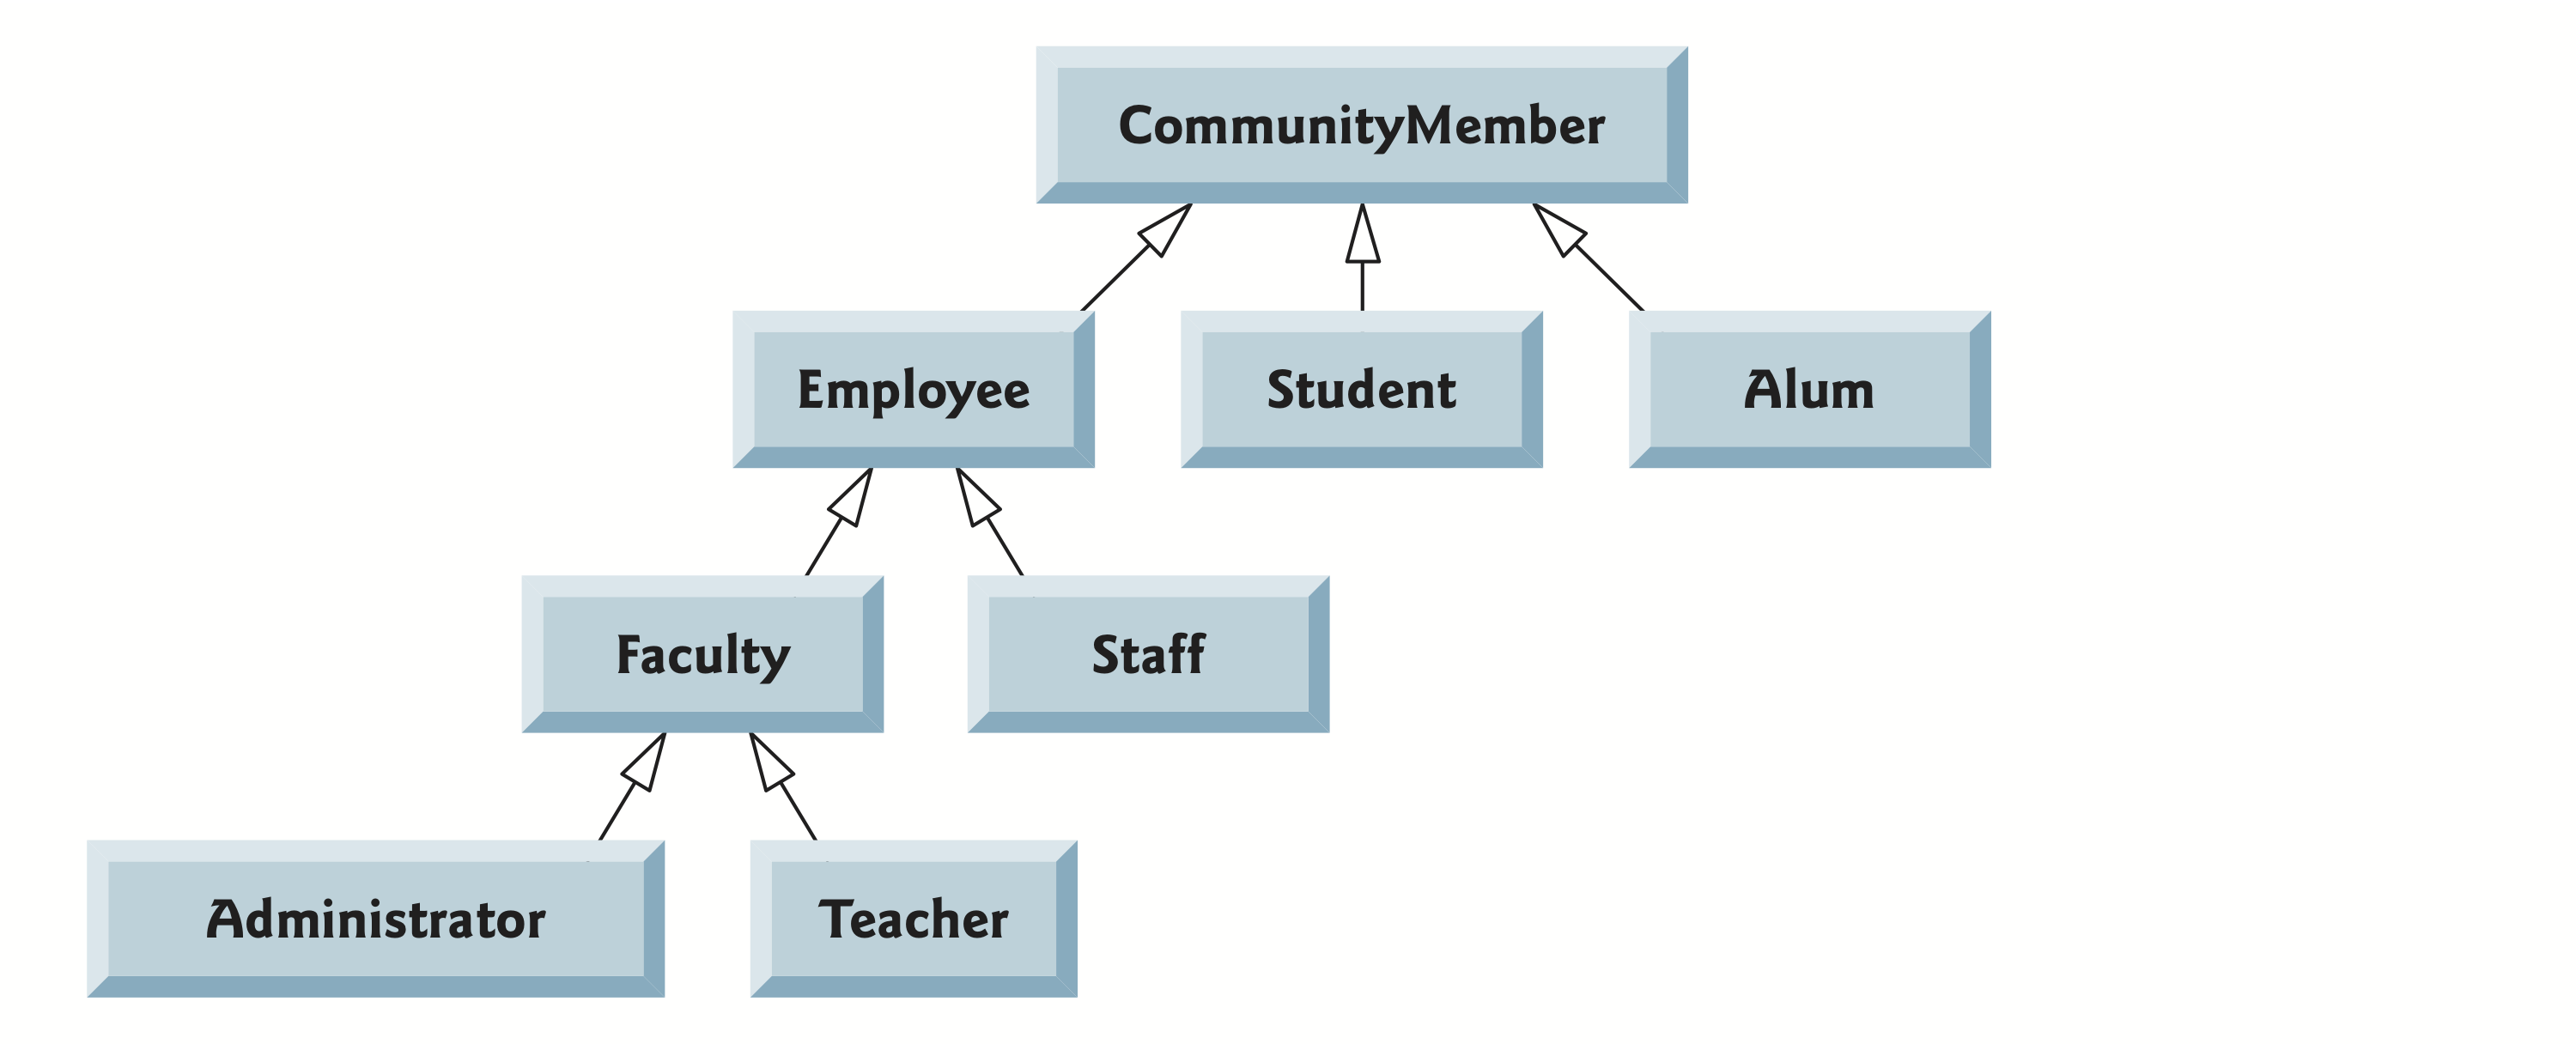

### Inheritance: “is a” relationship

* Each arrow in the hierarchy represents an _is-a_ relationship
    * “an `Employee` _is a_ `CommunityMember`” 
    * “a `Teacher` _is a_ `Faculty` member” 
* `CommunityMember` is the direct base class of `Employee`, `Student` and `Alum` and is an indirect base class of all the other classes in the diagram
Starting from the bottom, you can follow the arrows and apply the _is-a_ relationship up to the topmost superclass

### “is a” vs. “has a”
* Inheritance produces **“is-a” relationships** in which an object of a subclass type may also be treated as an object of the base-class type
* In **“has-a”** (composition) relationships, a class has references to one or more objects of other classes as members, such as `DeckOfCards` and `Card`

# 2.7 Building an Inheritance Hierarchy; Introducing Polymorphism
* Hierarchy containing types of employees in a company’s payroll app
* All employees of the company have a lot in common
    * _commission employees_ (who will be represented as objects of a base class) are paid a percentage of their sales
    * _salaried commission employees_ (who will be represented as objects of a subclass) receive a percentage of their sales _plus_ a base salary 


## 2.7.1 Base Class `CommissionEmployee` 
Class `CommissionEmployee` provides the following features: 
* Method `__init__` creates the data attributes `_first_name`, `_last_name` and `_ssn` (Social Security number), and uses the setter's of properties `gross_sales` and `commission_rate` to create their corresponding data attributes
* Read-only properties `first_name`, `last_name` and `ssn`, which return the corresponding data attributes
* Read-write properties `gross_sales` and `commission_rate` in which the `setter`s perform data validation
* Method `earnings`, which calculates and returns a `CommissionEmployee`’s earnings
* Method `__repr__`, which returns a string representation of a `CommissionEmployee`

```python
# commmissionemployee.py
"""CommissionEmployee base class."""
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales  # validate via property
        self.commission_rate = commission_rate  # validate via property

    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn

    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid."""
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')
        
        self._gross_sales = sales
        
    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError(
               'Interest rate must be greater than 0 and less than 1')
        
        self._commission_rate = rate

    def earnings(self):
        """Calculate earnings."""   
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        """Return string representation for repr()."""
        return ('CommissionEmployee: ' + 
            f'{self.first_name} {self.last_name}\n' +
            f'social security number: {self.ssn}\n' +
            f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')

```

### All Classes Inherit Directly or Indirectly from Class `object`
* _Every_ Python class inherits from an existing class
* When you do not explicitly specify the base class for a new class, Python assumes that the class inherits directly from class `object`
* Class `CommissionEmployee`’s header could have been written as
 
```python
class CommissionEmployee(object):
```
* The parentheses after `CommissionEmployee` indicate inheritance and may contain 
    * a single class for single inheritance 
    * a comma-separated list of base classes for **multiple inheritance**, i.e., a subclass that inherits from _several_ superclasses

### All Classes Inherit Directly or Indirectly from Class `object` (cont.)
* `CommissionEmployee` inherits all the methods of class `object`
* Two of the many methods inherited from `object` are `__repr__` and `__str__`
    * So _every_ class has these methods that return string representations of the objects on which they’re called
* When a base-class method implementation is inappropriate for a derived class, that method can be **overridden** (i.e., redefined) in the derived class with an appropriate implementation
    * Method `__repr__` overrides the default implementation from class `object`

### Testing Class `CommissionEmployee`  
* test some of `CommissionEmployee`’s features

In [ ]:
from commissionemployee import CommissionEmployee
from decimal import Decimal

In [ ]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', 
    Decimal('10000.00'), Decimal('0.06'))

In [ ]:
c

* calculate and display the `CommissionEmployee`’s earnings

In [ ]:
print(f'{c.earnings():,.2f}')

* change the `CommissionEmployee`’s gross sales and commission rate, then recalculate the earnings

In [ ]:
c.gross_sales = Decimal('20000.00')

In [ ]:
c.commission_rate = Decimal('0.1')

In [ ]:
print(f'{c.earnings():,.2f}')

## 2.7.2 Subclass `SalariedCommissionEmployee` 
* With single inheritance, the subclass starts essentially the same as the base class
* The real strength of inheritance comes from the ability to define in the subclass additions, replacements or refinements for the features inherited from the base class. 
* Many of a `SalariedCommissionEmployee`’s capabilities are similar, if not identical, to those of class `CommissionEmployee`
    * Both types of employees have first name, last name, Social Security number, gross sales and commission rate data attributes, and properties and methods to manipulate that data
* Inheritance enables us to “absorb” the features of a class _without_ duplicating code

### Declaring Class `SalariedCommissionEmployee` 
* Subclass `SalariedCommissionEmployee` _inherits_ most of its capabilities from class `CommissionEmployee`
* A `SalariedCommissionEmployee` _is a_ `CommissionEmployee` (because inheritance passes on the capabilities of class `CommissionEmployee`)
* Class `SalariedCommissionEmployee` also has the following features:
    * Method `__init__`, which initializes all the data inherited from class `CommissionEmployee`, then uses the `base_salary` property’s `setter` to create a `_base_salary` data attribute
    * Read-write property `base_salary`, in which the `setter` performs data validation.
    * A customized version of method `earnings`
    * A customized version of method `__repr__`

```python
# salariedcommissionemployee.py
"""SalariedCommissionEmployee derived from CommissionEmployee."""
from commissionemployee import CommissionEmployee
from decimal import Decimal

class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus 
    commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate, base_salary):
        """Initialize SalariedCommissionEmployee's attributes."""
        super().__init__(first_name, last_name, ssn, 
                         gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property

    @property
    def base_salary(self):
        return self._base_salary

    @base_salary.setter
    def base_salary(self, salary):
        """Set base salary or raise ValueError if invalid."""
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')
        
        self._base_salary = salary

    def earnings(self):
        """Calculate earnings."""   
        return super().earnings() + self.base_salary

    def __repr__(self):
        """Return string representation for repr()."""
        return ('Salaried' + super().__repr__() +      
            f'\nbase salary: {self.base_salary:.2f}')

```

### Inheriting from Class `CommissionEmployee`

```python
class SalariedCommissionEmployee(CommissionEmployee):
```
* specifies that class `SalariedCommissionEmployee` _inherits_ from `CommissionEmployee`
* Don't see class `CommissionEmployee`’s data attributes, properties and methods in class `SalariedCommissionEmployee`, but they are there

### Method `__init__` and Built-In Function `super` 
* _Each subclass `__init__` must explicitly call its base class’s `__init__` to initialize the data attributes inherited from the base class_
    * This call should be the first statement in the subclass’s `__init__` method
* The notation `super().__init__` uses the built-in function **`super`** to locate and call the base class’s `__init__` method

### Overriding Method `earnings`
* Class `SalariedCommissionEmployee`’s `earnings` method overrides class `CommissionEmployee`’s `earnings` method to calculate the earnings of a `SalariedCommissionEmployee`
    * Obtains the portion of the earnings based on _commission alone_ by calling `CommissionEmployee`’s `earnings` method with the expression `super().earnings()`
   

### Overriding Method `__repr__`
* `SalariedCommissionEmployee`’s `__repr__` method overrides class `CommissionEmployee`’s `__repr__` method to return a `String` representation that’s appropriate for a `SalariedCommissionEmployee`
* `super().__repr__()` calls `CommissionEmployee`'s `__repr__` method

### Testing Class `SalariedCommissionEmployee` 

In [ ]:
from salariedcommissionemployee import SalariedCommissionEmployee

In [ ]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
        Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

In [ ]:
print(s.first_name, s.last_name, s.ssn, s.gross_sales, 
      s.commission_rate, s.base_salary)

* `SalariedCommissionEmployee` object has _all_ of the properties of classes `CommissionEmployee` _and_ `SalariedCommissionEmployee`
* Calculate and display the `SalariedCommissionEmployee`’s earnings

In [ ]:
print(f'{s.earnings():,.2f}')

* Modify the `gross_sales`, `commission_rate` and `base_salary` properties, then display the updated data via the `SalariedCommissionEmployee`’s `__repr__` method

In [ ]:
s.gross_sales = Decimal('10000.00')

In [ ]:
s.commission_rate = Decimal('0.05')

In [ ]:
s.base_salary = Decimal('1000.00')

In [ ]:
print(s)

* Calculate and display the `SalariedCommissionEmployee`’s updated earnings

In [ ]:
print(f'{s.earnings():,.2f}')

### Testing the “is a” Relationship 
Functions **`issubclass`** and **`isinstance`** are used to test “is a” relationships
* `issubclass` determines whether one class is derived from another

In [ ]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

* `isinstance` determines whether an object has an “is a” relationship with a specific type

In [ ]:
isinstance(s, CommissionEmployee)

In [ ]:
isinstance(s, SalariedCommissionEmployee)

## 2.7.3 Processing `CommissionEmployee`s and `SalariedCommissionEmployee`s Polymorphically
* With inheritance, every object of a subclass also may be treated as an object of that subclass’s base class
* Can take advantage of this relationship to place objects related through inheritance into a list, then iterate through the list and treat each element as a base-class object
    * Allows a variety of objects to be processed in a _general_ way

In [ ]:
employees = [c, s]

In [ ]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

* Correct string representation and earnings are displayed for each employee
* This is called _polymorphism_ — a key capability of object-oriented programming (OOP)

 ------
&copy;1992&ndash;2020 by Pearson Education, Inc. All Rights Reserved. This content is based on Chapter 1 of the book [**Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud**](https://amzn.to/2VvdnxE).         